Lista de Exercícios 1
=====================

## Resumo do artigo: *Synthesis of Feedback Controls Using Optimization Theory - An Example*

O artigo, publicado em 1962 por F. J. Ellert e C. W. 
Merriam, apresenta a modelagem e design de um 
controlador ótimo para o sistema de pouso de uma 
aeronave.
O Método de Expansão Paramétrica foi utilizado para a 
síntese do controlador.
O sistema a ser controlado é introduzido ao leitor já na 
sua forma simplificada e linearizada, desprezando a 
influência de grandezas como a velocidade horizontal ou 
translado lateral da aeronave.

### Modelo do Sistema

O problema é modelado a partir da relação entre a altura da 
aeronave [$h(t)$] e o angulo de ataque do profundor (*elevator*) [$\delta_e(t)$]:
\begin{equation}
    \label{eq:dif-eq-model}\tag{1}
    \frac{d^4h(t)}{dt^4} + 2\zeta\omega_s\frac{d^3h(t)}{dt^3}
    +\omega_s^2\frac{d^2h(t)}{dt^2} = K_sV\omega_s\delta_e(t)
\end{equation}
para:
 * [$\zeta\ $] o fator de amortecimento de curto período [0,5];
 * [$\omega_s$] a frequência de ressonância de curto período [1 rad/s];
 * [$K_s$]  o ganho de curto período [-0,95 s\textsuperscript{-1}]; e 
 * $V\ $]  a velocidade horizontal da aeronave, contante e igual a aproximadamente 281 km/h (256 ft/s)

A equação diferencial de quarta ordem apresentada em 
\eqref{eq:dif-eq-model} é completamente definida com um espaço
de estados de igualmente quarta ordem. Dessa forma o conjunto 
de variáveis $h(t)$, $h'(t)$, $h''(t)$, $h'''(t)$ define 
completamente o estado do sistema.

As grandezas $h(t)$ e $h'(t)$ além de associarem-se a grandezas 
físicas de grande significância, são também facilmente mensuráveis a partir de instrumentos como altimetro e variômetro respectivamente, diferentemente das duas outras.
Por esse motivo, o autor substituiu, no espaço de estados, as derivadas de maior ordem por grandezas associadas ao ângulo de inclinação negativa do nariz da aeronave [$\theta(t)$], por meio da equação apresentada em \eqref{eq:eq-dif-substituicao}:
\begin{equation}
    \label{eq:eq-dif-substituicao}\tag{2}
    h'(t) = \frac{V}{sT_s + 1}\theta(t)
\end{equation}

em que $T_s$ é uma constante de tempo do trajeto e igual a 
2,5 s. A equação \eqref{eq:eq-dif-substituicao} é expandida para:
$$
    h''(t) = \frac{V}{T_s}\theta(t) - \frac{h'(t)}{T_s}
$$
$$
    h'''(t) = \frac{V}{T_s}\theta'(t) - \frac{V}{T_s^2}\theta(t)
    + \frac{h'(t)}{T_s^2}
$$
$$
    h''''(t) = \frac{V}{T_s}\theta''(t) - \frac{V}{T_s^2}\theta'(t) + \frac{V}{T_s^3}\theta - \frac{h'(t)}{T_s^3}
$$

O modelo do sistema de pouso da aeronave em espaço de estados é 
então obtida a partir das equações acima e da equação 
\eqref{eq:dif-eq-model}:

\begin{equation}
    \dot x = Ax + Bu
\end{equation}
tal que:
\begin{align}
    x = \begin{bmatrix}
        \theta '(t) \\
        \theta (t) \\
        h'(t) \\
        h(t)
    \end{bmatrix} \quad A = \begin{bmatrix}
        a & b & c & 0 \\
        1 & 0 & 0 & 0 \\
        0 & d & e & 0 \\
        0 & 0 & 1 & 0 
    \end{bmatrix} \quad B = \begin{bmatrix} 
        f \\ 0 \\ 0 \\ 0
    \end{bmatrix} \quad u = \delta_e(t) \\
    a = -2\omega_s\zeta + \frac{1}{T_s}; \quad
    b = -\omega_s^2 + \frac{2\omega_s\zeta}{T_s} - \frac{1}{T_s^2}; \\
    c = \frac{\omega_s^{2}}{V} - \frac{2 \omega_s \zeta}{T_{s} V} 
        + \frac{1}{T_{s}^{2} V}; \quad
    d = V/T_s; \quad
    e = -1/T_s; \quad
    f = K_sT_s\omega_s^2
\end{align}


### Formulação da Função de Custo
A função custo do sistema é modelado pelo funcional
$$
    J = \int_t^T e(\sigma) d\sigma
$$
tal que $e(\sigma)$ é o erro quadrático ponderado definido por:

$$
   e(\sigma) = [x_d(\sigma) - x(\sigma)]^T\Phi(\sigma) [x_d(\sigma) - x(\sigma)] + \delta_e(\sigma)^2;
$$
tal que 
$$
\Phi(\sigma) = \begin{bmatrix} 
       \Phi_1(\sigma) &0 &0 &0\\
        0&\Phi_2(\sigma)&0&0 \\
        0&0&\Phi_3(\sigma)&0 \\
        0&0&0&\Phi_4(\sigma) 
    \end{bmatrix} \text{, e }
    x_d(\sigma) = \begin{bmatrix} 
        \theta'_d(\sigma) \\
        \theta_d(\sigma) \\
        h'_d(\sigma) \\
        h_d(\sigma) 
    \end{bmatrix}
$$
sejam $\Phi$ o vetor de coeficientes de ponderação dependentes do tempo $\sigma$, $x_d$ a trajetória desejável para os estados do sistema durante o período de pouso, $T$ a operação de transposição da matriz. 

No artigo, os autores desenvolvem uma argumentação para justificar a escolha da trajetória desejada e dos coeficientes de ponderação apresentados a seguir, em termos de conforto, segurança e limites de operação da aeronave:
$$
x_d(\sigma) = \begin{bmatrix}
   0 \\
   2 \\
   h_d'(\sigma)\\
   h_d(\sigma)
\end{bmatrix} \quad
h_d(\sigma) = \begin{cases}
    100e^{-\sigma/5}, \quad & 0\leq \sigma \leq 15\\
    20 - \sigma \quad & 15 < \sigma \leq 20
\end{cases}; \quad
h'_d(\sigma) = \begin{cases}
    -20e^{-\sigma/5}, \quad & 0\leq \sigma \leq 15\\
    - 1 \quad & 15 < \sigma \leq 20
\end{cases}
$$
$$
   \Phi_1(\sigma) = \phi_1; \quad
   \Phi_{2}(\sigma) = \phi_{2f} i(\sigma - 20); \quad
   \Phi_3(\sigma) = \phi_3 d(\sigma - 15) + \phi_{3f}i(\sigma - 20); \quad
   \Phi_4(\sigma) = \phi_4 + \phi_{4f}i(\sigma -20)
$$
para $i(t)$ e $d(t)$ as funções impulso e degrau, respectivamente, e $\phi_1, \phi_{2f}. \phi_3, \phi_{3f}, \phi_4, \phi_{4f}$ constantes reais.

### Método de Expansão Paramétrica

Seja portanto a função custo definida por $J(t)$, suponha-se que exista uma trajetória de controle ótima $\delta_e^*(t)$ que minimize a função custo para qualquer ponto de partida no espaço de estados.
Segundo o autor, a condição necessária para que um custo mínimo $J^*[x(\mu), \mu]$ exista é:
$$
 \min_{\delta_e(\mu)}\left\{e(\mu) + \frac{dJ^*}{d\mu}\right\} = 0 
$$

Uma vez que $J^*$ é função de duas variáveis, pode-se expandir a expressão anterior para:
$$
   \min_{\delta_e(\mu)}\left\{e(\mu) + \frac{\partial J^*}{\partial \mu} + \sum_{n=1}^N \frac{\partial J^*}{\partial x_n} \frac{d x_n}{d \mu}  \right\} = 0 
$$
$$
   \min_{\delta_e(\mu)}\left\{e(\mu) + \frac{\partial J^*}{\partial \mu} + \sum_{n=1}^N \frac{\partial J^*}{\partial x_n} \dot{x_n}  \right\} = 0 
$$
$$
   \min_{\delta_e(\mu)}\left\{e(\mu) + \frac{\partial J^*}{\partial \mu} + \left( \frac{\partial J^*}{\partial x}\right)^T \dot{x}  \right\} = 0 
$$
e uma vez que o termo $\frac{\partial J^*}{\partial \mu}$ independe da variação da ação de controle $\delta_e(\mu)$:
\begin{equation}
   \label{eq:HJB}\tag{3}
   \min_{\delta_e(\mu)}\left\{e(\mu)  + \left( \frac{\partial J^*}{\partial x}\right)^T \dot{x}  \right\}+ \frac{\partial J^*}{\partial \mu} = 0
\end{equation}
também conhecida como a equação de Hamilton-Jacobi-Bellman.

A equação é satisfeita assumindo-se uma trajetória de controle ótima, ou seja, uma trajetória $\delta_e^*(\mu)$ que minimize a equação. O valor mínimo é obtido, no entanto, quando a derivada da equação a ser minimizada em relação a $\delta_e$ é igual a zero:
$$
   \frac{\partial \left[e(\mu) + \left( \frac{\partial J^*}{\partial x}\right)^T \dot{x}\right]}{\partial \delta_e} \Bigg|_{\delta_e^*} = 0
$$
$$
   2\delta_e^* + \frac{\partial J^*}{\partial x_1} \left( K_sT_s\omega_s \right) = 0
$$
\begin{equation}
   \label{eq:ocontrol}\tag{4}
   \delta_e^* = -\frac{1}{2}\frac{\partial J^*}{\partial x_1} \left( K_sT_s\omega_s^2 \right)
\end{equation}

Assumindo que a função custo ótima possui uma forma:
\begin{equation}
   \label{eq:ocost}\tag{5}
   J^* = k(\mu) - 2\sum_{m=1}^N k_m(\mu)x_m(\mu) + \sum_{m=1}^N\sum_{p=1}^N k_{mp}(\mu)x_m(\mu)x_p(\mu)
\end{equation}
tal que $k_{mp} = k_{pm}$. A equação \eqref{eq:ocontrol} toma então a forma:
\begin{equation}
   \label{eq:ocontrol-expanded}\tag{6}
   \delta_e^* = \left(k_1(\mu) - \sum_{m=1}^4 k_{1m}(\mu)x_m(\mu) \right)(K_sT_s\omega_s^2)
\end{equation}
e portanto os coeficientes da expansão \eqref{eq:ocontrol} tornam-se os parâmetros da ação de controle.

Substituindo-se a equações \eqref{eq:ocontrol-expanded} e \eqref{eq:ocost} em \eqref{eq:HJB}, obtém-se uma equação diferencial em termos das matrizes do sistema e dos coeficientes $k_m$ e $k_{mp}$ da forma:
$$
    P_0 + \sum_{m=1}^N P_mx_m(\mu) + \sum_{m=1}^N\sum_{p=1}^N P_{mp}x_m(\mu)x_p(\mu) = 0
$$
que para ser garantida verdadeira para qualquer trajetória:
$$
   P_0 = P_m = P_{mp} = 0
$$
que termina por formular um sistema de $1 + N + \frac{N(N+1)}{2}$ equações com condição de contorno
$$
   k(T) = k_m(T) = k_{mp}(T) = 0.
$$
a solução dessas equações para o período $t\leq \mu \leq T$ resulta na determinação da trajetória de 
controle ótima.

In [1]:
import numpy as np
from scipy import signal as sgn
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

## Definição do Modelo
# constantes
T_s     = 2.5   # s
K_s     = -0.95 # s^{-1}
omega_s = 1     # rad/s
zeta    = 0.5   # 
V       = 256    # ft/s

# matriz de transição de estados:
a = 1 / T_s - 2 * omega_s * zeta
b = 2 * omega_s * zeta / T_s - omega_s ** 2 \
    - 1 / T_s ** 2
c = (omega_s ** 2 - 2 * omega_s * zeta / T_s \
    + 1 / T_s ** 2) / V
d = V / T_s
e = -1 / T_s
f = K_s * T_s * omega_s ** 2

A = [[a, b, c, 0.], [1., 0., 0., 0.],
     [0., d, e, 0.], [0., 0., 1., 0.]]
B = [[f], [0.], [0.], [0.]]
C = [0., 0., 0., 1.]
D = 0.0

A = np.array(A)
B = np.array(B)

sys = sgn.StateSpace(A,B,C,D)

# Condições de Contorno
x0_1 = [0., -0.0625, -16., 120.]
x0_2 = [0., -0.0781, -20., 100.] 
x0_3 = [0., -0.0938, -24., 80.] 

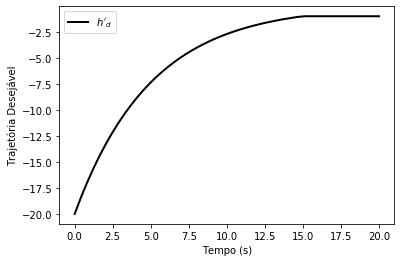

In [2]:
plt.figure(1)
t = np.linspace(0, 20)
plt.plot(t, 
    np.hstack(
        (-20 * np.exp(-t[t <= 15] / 5),
        -np.ones_like(t[t > 15]))),
        'k-',linewidth=2,label="$h\'_d$")
plt.xlabel('Tempo (s)')
plt.ylabel('Trajetória Desejável')
plt.legend(loc='best')
plt.show()

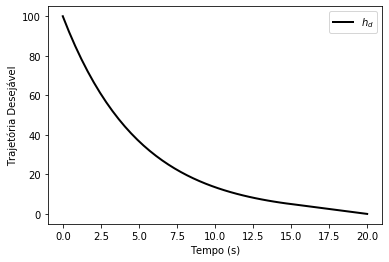

In [3]:
plt.figure(1)
plt.plot(t, 
    np.hstack(
        (100 * np.exp(-t[t <= 15] / 5),
         (20 - t[t > 15]))),
        'k-',linewidth=2,label='$h_d$')
plt.xlabel('Tempo (s)')
plt.ylabel('Trajetória Desejável')
plt.legend(loc='best')
plt.show()

Computação das equações K
-------------------------

Para determinar os parâmetros ótimos de controle são necessários definir os casos de estudo e consequentemente os valores dos coeficientes da função custo. 
Nesse `notebook` apenas um dos casos deve ser selecionado por vez para correta computação do sistema.

In [4]:
## Caso I :
def phi_1(n): return 0
def phi_2(n): return 0
def phi_3(n): return 0
def phi_4(n): return 0.000171

In [81]:
## Caso II :
# [n = 20 - t]
def phi_1(n): return 0
def phi_2(n): return 0
def phi_3(n): return 0

# a função impulso depende do passo de 
# simulação. Portanto assume-se um passo
# mínimo de 1e-6:
def phi_4(n): return 1 / 1e-6 if n == 0. \
                else 0

In [4]:
## Caso III :
# [n = 20 - t]
def phi_1(n): return 99.
# a função impulso depende do passo de 
# simulação. Portanto assume-se um passo
# mínimo de 1e-6:
def phi_2(n): return 10. / 1e-6 if n == 0.\
                else 0.
def phi_3(n): return 1e-4 if n != 0. \
                else 1e-4 + 0.01 / 1e-6
def phi_4(n): return 5e-5 if n != 0. \
                else 5e-5 + 1e-3 / 1e-6

In [5]:
def k_eq(t, w):
    k1, k2, k3, k4, k11, k12, k13, k14, \
    k22, k23, k24, k33, k34, k44 = w

    # p_#, d_# = phi_#, x_d#
    p_1 = phi_1(t)
    p_2 = phi_2(t)
    p_3 = phi_3(t)
    p_4 = phi_4(t)
    d_1 = 0
    d_2 = 2
    d_3 = -1 if t < 5 else \
        -20 * np.exp(t / 5 - 4)
    d_4 = t if t < 5 else \
        100 * np.exp(t / 5 - 4)
    
    K1  = p_1 * d_1 + a * k1 + k2 \
        - f ** 2 * k1 * k11
    K2  = p_2 * d_2 + b * k1 + d * k3 \
        - f ** 2 * k1 * k12
    K3  = p_3 * d_3 + c * k1 + e * k3 \
        + k4 - f ** 2 * k1 * k13
    K4  = p_4 * d_4 - f ** 2 * k1 * k14
    K11 = p_1 + 2 * a * k11 + 2 * k12 \
        - f ** 2 * k11 ** 2
    K12 = a * k12 + b * k11 + k22 + d * k13 \
        - f ** 2 * k11 * k12
    K13 = a * k13 + c * k11 + k23 + e * k13 \
        + k14 - f ** 2 * k11 * k13
    K14 = a * k14 + k24 - f ** 2 * k11 * k14
    K22 = p_2 + 2 * b * k12 + 2 * d * k23 \
        - f ** 2 * k12 ** 2
    K23 = e * k23 + b * k13 + c * k12 \
        + d * k33 + k24 - f ** 2 * k12 * k13
    K24 = b * k14 + d * k34 \
        - f ** 2 * k12 * k14
    K33 = p_3 + 2 * e * k33 + 2 * c * k13 \
        + 2 * k34 - f ** 2 * k13 ** 2
    K34 = e * k34 + c * k14 + k44 \
        - f ** 2 * k13 * k14
    K44 = p_4 - f ** 2 * k14 ** 2
    
    return [K1, K2, K3, K4, K11, K12, K13,
        K14, K22, K23, K24, K33, K34, K44]

k_f = [0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]

In [6]:
sol = solve_ivp(k_eq, [0, 20], k_f, 
                dense_output=True,
                rtol=1e-6, 
                atol=1e-8,
#                max_step=5e-4,
                first_step = 1e-6)

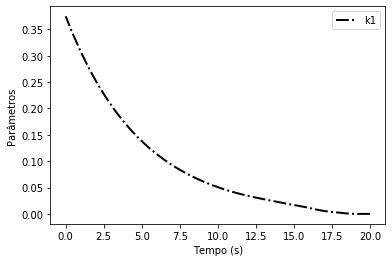

In [7]:
plt.figure(1)
plt.plot(20-sol.t,sol.y[0],'k-.',linewidth=2,label='k1')

plt.xlabel('Tempo (s)')
plt.ylabel('Parâmetros')
plt.legend(loc='best')
plt.show()

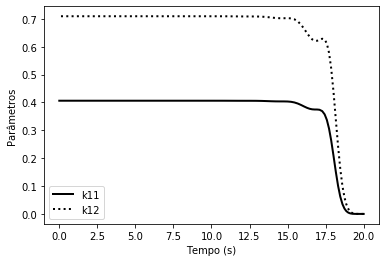

In [8]:
plt.figure(1)
plt.plot(20-sol.t,sol.y[4],'k-',linewidth=2,label='k11')
plt.plot(20-sol.t,sol.y[5],'k:',linewidth=2,label='k12')

plt.xlabel('Tempo (s)')
plt.ylabel('Parâmetros')
plt.legend(loc='best')
plt.show()

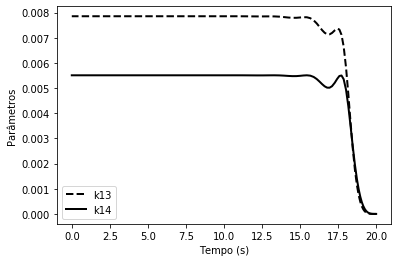

In [9]:
plt.figure(1)
plt.plot(20-sol.t,sol.y[6],'k--',linewidth=2,label='k13')
plt.plot(20-sol.t,sol.y[7],'k-',linewidth=2,label='k14')

plt.xlabel('Tempo (s)')
plt.ylabel('Parâmetros')
plt.legend(loc='best')
plt.show()

### Solução do Sistema em Malha Fechada

Uma vez encontrados os parâmetros de controle, pode-se fazer a simulação do sistema em malha fechada:

In [10]:
k1  = interp1d(20-sol.t, sol.y[0])
k11 = interp1d(20-sol.t, sol.y[4])
k12 = interp1d(20-sol.t, sol.y[5])
k13 = interp1d(20-sol.t, sol.y[6])
k14 = interp1d(20-sol.t, sol.y[7])

def system(t, w):
    # x' = Ax + Bu
    # u = f[k1 - k^T * x]
    # k = [k11, k12, k13, k14]^T
    
    x  = np.transpose([w])
    k  = np.array([[k11(t), k12(t), 
                   k13(t), k14(t)]])
    u  = f * (k1(t) - k @ x)
    dx = A @ x + B * u
    
    return dx.transpose()[0]

In [11]:
x1 = solve_ivp(system, [0., 20.], x0_1,
                rtol=1e-6, 
                atol=1e-8)
x2 = solve_ivp(system, [0., 20.], x0_2,
                rtol=1e-6, 
                atol=1e-8)
x3 = solve_ivp(system, [0., 20.], x0_3,
                rtol=1e-6, 
                atol=1e-8)

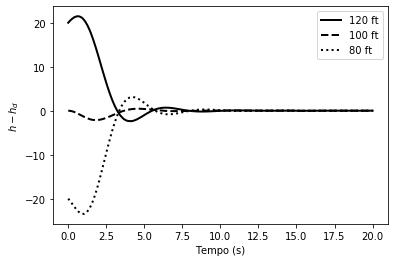

In [12]:
def h_d(x) : return np.hstack(
         (100 * np.exp(-x.t[x.t <= 15] / 5),
          (20 - x.t[x.t > 15]) ))

plt.figure(1)
plt.plot(x1.t, x1.y[3] - h_d(x1),
         'k-',linewidth=2,label='120 ft')
plt.plot(x2.t, x2.y[3] - h_d(x2),
         'k--',linewidth=2,label='100 ft')
plt.plot(x3.t, x3.y[3] - h_d(x3),
         'k:',linewidth=2,label='80 ft')

plt.xlabel('Tempo (s)')
plt.ylabel('$h - h_d$')
plt.legend(loc='best')
plt.show()

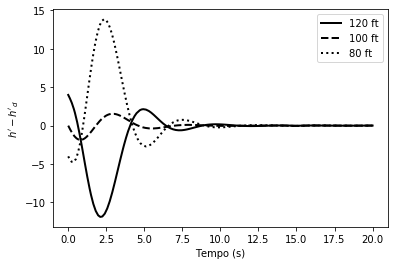

In [13]:
def dh_d(x) : return np.hstack(
        (-20 * np.exp(-x.t[x.t <= 15] / 5),
        -np.ones_like(x.t[x.t > 15])))

plt.figure(1)
plt.plot(x1.t,x1.y[2] - dh_d(x1),
         'k-',linewidth=2,label='120 ft')
plt.plot(x2.t, x2.y[2] - dh_d(x2),
         'k--',linewidth=2,label='100 ft')
plt.plot(x3.t, x3.y[2] - dh_d(x3),
         'k:',linewidth=2,label='80 ft')

plt.xlabel('Tempo (s)')
plt.ylabel('$h\' - h\'_d$')
plt.legend(loc='best')
plt.show()

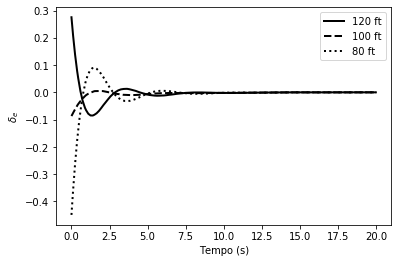

In [14]:
def u(x) : 
    return f * (k1(x.t) - k11(x.t) * x.y[0] \
      - k12(x.t) * x.y[1] - k13(x.t) * x.y[2]\
      - k14(x.t) * x.y[3])

plt.figure(1)
plt.plot(x1.t, u(x1),
         'k-',linewidth=2,label='120 ft')

plt.plot(x2.t, u(x2),
         'k--',linewidth=2,label='100 ft')

plt.plot(x3.t, u(x3),
         'k:',linewidth=2,label='80 ft')

plt.xlabel('Tempo (s)')
plt.ylabel('$\delta_e$')
plt.legend(loc='best')
plt.show()

#### Conclusões

O artigo apresenta um estudo de caso simplificado de projeto de controlador ótimo para sistema de pouso de uma aeronave. O Método de Expansão de Parâmetros é utilizado.

A maior parte da discussão é desenvolvida em torno da formulação da função custo e do impácto causado pela escolha dos coeficientes de ponderação. Tanto no artigo quanto na reprodução feita aqui é possível perceber que o problema de projeto do controlador se dá na escolha desses parâmetros, uma vez que as demais etapas são sintetizadas automaticamente.

### Ex 2:

#### a) Escreva as equações de estado do sistema

As equações que regem o sistema são:
$$ L_f \frac{di_f(t)}{dt} + R_fi_f + K_f \dot{\theta}(t) = e(t)$$
$$ \lambda(t) = \ddot{\theta}(t)I + \dot{\theta}(t)B + \lambda_L(t)$$
$$ \lambda(t) = K_f i_f $$
assim, é possível descrever o sistema em espaço de estados como:

$$\dot{x} = Ax + Bu$$
tal que
\begin{align}
    x = \begin{bmatrix} 
        i_f\\ 
        \dot{\theta}
    \end{bmatrix}; \quad
    u = \begin{bmatrix}
        e(t) \\ \lambda_L(t)
    \end{bmatrix}; \quad
    A = \begin{bmatrix}
        -\frac{R_f}{L_f} & 
        -\frac{K_f}{L_f}\\
        \frac{K_f}{I} & 
        -\frac{B}{I}
    \end{bmatrix}; \quad
    B = \begin{bmatrix}
        \frac{1}{L_f} & 0 \\
        0 & -\frac{1}{I}
    \end{bmatrix}
\end{align}

#### b) Determinar um conjunto de restrições fisicamente razoáveis para os estados e controle

As restrições mais óbvias são os limites de operação da fonte regulada de tensão contínua. Considerando uma fonte chaveada é razoável admitir limites mínimo e máximo de tensão tais que:
$$ 0 < V_{min} \leq e(t) \leq V_{max} $$
limites máximos de corrente podem ser estipulados como
$$ 0 < i_f(t) < I_{max} $$

Quanto à parte mecânica do sistema, podemos considerar que o movimento e a carga são limitadas a um único sentido e limitados por um valor máximo:
$$ 0 \leq \dot{\theta}(t) < \dot{\theta}_{max} $$
$$ 0 \leq \lambda_L(t) < \lambda_{max} $$

#### c) Sugira um índice de desempenho se
#### i) $L_f = 0$

Se a indutância é nula, a corrente se comportará de forma estática, formando um novo espaço de estados unidimensional:

\begin{align}
x = \dot{\theta}(t); \quad 
u = \begin{bmatrix}
        e(t) \\ \lambda_L(t)
    \end{bmatrix}; \quad
A = -\frac{B}{I} - \frac{K_f^2}{R_fI}; \quad
B = \begin{bmatrix}
        \frac{K_f}{R_fI} & -\frac{1}{I}
    \end{bmatrix}
\end{align}

Dessa forma, a única variável de interesse a ser considerada é a velocidade angular do rotor que deve ser a mais próxima possível da velocidade desejada ($\alpha\times$5 rad/s) onde $\alpha$ é uma constante de transformação dada as características físicas do veículo.

Uma vez que a única variável que pode ser controlada para diminuir o esforço da fonte é o próprio sinal de controle $e(t)$, pode-se definir uma função custo de operação para um período de tempo $[t, t_f]$ como a seguir:

$$ J = \int_t^{t_f} [q_{\theta}(\dot{\theta}(\tau) - 5\alpha)^2 + re(\tau)] d\tau $$
para $r$ e $q_\theta$ coeficientes de ponderação da função custo.

#### ii) $L_f \neq 0$

Com a presença da corrente como uma variável de estado, é de interesse que essa seja 
a menor possível a fim de reduzir a potência, e principalmente aumentar a vida útil da bateria. Dessa forma modela-se uma função custo como:

$$ J = \int_t^{t_f} [q_i(i_f(\tau) - 0)^2 + q_{\theta}(\dot{\theta}(\tau) - 5\alpha)^2 + re(\tau)] d\tau $$

### Ex. 3
#### a) determine as restrições de estados e controle

Supoem-se que os propulsores apresentam um torque máximo de operação, porém esse valor pode ser tanto positivo quanto negativo, de forma que:

$$  |\lambda(t)| \leq \lambda_{max}$$

Supondo que o controle da atitude da nave se dá com o objetivo de controlar a trajetória do veículo, assume-se que variações muito grandes podem desviar completamente a trajetória. Seja $\delta_\theta$ uma variação de ângulo máxima remediável, tem-se:
$$|\theta(t) - 15| \leq \delta_\theta.$$

De igual modo, assume-se uma velocidade angular máxima remediável $\delta_\dot\theta$ tal que
$$|\dot\theta(t)| \leq \delta_\dot\theta$$

#### b) Sugira um critério de desempenho apropriado

$$J = (x(30) - \delta)^TH(x(30) - \delta) + \int_0^{30} [(x(t) - \delta)^TQ(x(t) - \delta) + Ru(t)] dt$$
para
$$ x(\tau) = \begin{bmatrix} \dot\theta(\tau) \\ \theta(\tau) \end{bmatrix}; \quad \delta = \begin{bmatrix} 0 \\ 15 \end{bmatrix}; \quad u(\tau) = \lambda(\tau)$$
e $H$, $Q$ e $R$ matrizes de ponderação que determinam a característica da função custo.

### Ex. 4
Considerando-se o tempo mínimo, a função custo passa a ter uma parcela referente ao tempo dentro da integral:

$$J = (x(30) - \delta)^TH(x(30) - \delta) + \int_0^{30} [(x(t) - \delta)^TQ(x(t) - \delta) + Ru(t) + \gamma] dt$$
para $\gamma$ um coeficiente de ponderação do tempo gasto para alcançar o objetivo.

### Ex. 5
#### a) Conjunto de restrições

Iniciando pelas variáveis de controle poder-se-ía determinar como inconsistente um empuxo negativo, ou com angulo maior que uma rotação completa:
$$ 0 \leq T(t) \leq T_{max} ;\quad 0 \leq \beta(t) < 2\pi.$$

Para as variáveis de estado, considera-se limites para as posições e velocidades tais que sejam positivas ou zero, uma vez que objetiva-se alcançar valores positivos de $x$ e $y$:
$$x_1(t) \geq 0;\quad x_2(t) \geq 0;\quad x_3(t) \geq 0;\quad x_4(t) \geq 0.$$

Quanto à massa, existe um limite óbvio definido pelo valor inicial de massa do veículo e um peso mínimo após a depleção de combustível:
$$m_{min} < x_5(t) \leq x_5(0).$$

#### b) Sugira um critério de desempenho para $y(t_f)$ = 3 km e $\max{x(t_f)}$, $t_f$ fixo.

Dado um tempo fixo de controle, assume-se que a nave deva estacionar no instante $t_f$. Para tanto assume-se a seguinte função custo:

$$J = h(x(t_f), t_f) + \int_t^{t_f} g(x(\tau), \tau)d\tau$$
$$ h(x(t_f), t_f) = h_y(x_3-3)^2 + h_\dot{x}(x_2)^2 + h_\dot{y}(x_4)^2$$
$$ g(x(\tau), \tau) = -q_xx_1(\tau)$$

para $h_i$ e $q_i$ constantes de ponderação.

#### c) Sugira um critério de desempenho para $x(t_f)$ = 500 km, $y(t_f)$ = 3 km, $t_f$ fixo, e máxima massa.
$$ h(x(t_f), t_f) = h_x(x_1-500)^2 + h_y(x_3-3)^2 + h_\dot{x}(x_2)^2 + h_\dot{y}(x_4)^2$$
$$ g(x(\tau), \tau) = -q_mx_5(\tau)$$

